In [235]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

# 경고메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [236]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [237]:
eco_df = pd.read_excel("fin_dataset_ecovalue.xlsx")
eco_df = eco_df.drop(columns={"goo_nm","dong_nm","gd_nm"})

In [238]:
eco_df

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
0,7,18,1,0,9.253223,0.093635
1,5,0,2,1,9.253223,0.067113
2,7,1,2,2,9.253223,0.047275
3,26,4,0,5,9.534345,0.052174
4,48,4,2,0,9.902274,0.145209
...,...,...,...,...,...,...
88,3,1,0,0,9.902274,0.043457
89,5,0,1,0,9.902274,0.035870
90,2,0,1,0,8.720180,0.047081
91,6,2,0,0,8.720180,0.043489


In [6]:
pcs = PCA()
pcs.fit(eco_df)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6
Standard deviation,7.7586,5.1534,1.6686,1.2850,0.3881,0.044
Proportion of variance,0.6590,0.2908,0.0305,0.0181,0.0016,0.000
Cumulative proportion,0.6590,0.9498,0.9803,0.9983,1.0000,1.000


In [8]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=eco_df.columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6
count_bicycle,0.883547,-0.466739,-0.035699,-0.000653,-0.014942,-0.001146
count_green,0.466640,0.884067,-0.015249,-0.014688,0.014985,-0.000450
count_school,0.022125,0.010104,0.392362,0.919360,0.015263,-0.002347
count_top,0.032929,-0.008997,0.917309,-0.393067,0.053627,0.001410
air_value,0.004144,-0.019924,-0.055577,0.007338,0.997877,0.026180
ecocar_ratio,0.001120,0.000421,0.001035,0.002514,-0.026183,0.999653


출처 : https://romg2.github.io/mlguide/14_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-06.-%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C-SVD/

# one_ratio와 함께 수요지수환산

In [239]:
eco_df = pd.read_excel("fin_dataset_ecovalue.xlsx")
eco_df = eco_df.drop(columns={"goo_nm","dong_nm"})
eco_df.set_index("gd_nm",inplace=True)

In [241]:
eco_df

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
gd_nm,,,,,,
송파구 가락1동,7,18,1,0,9.253223,0.093635
송파구 가락2동,5,0,2,1,9.253223,0.067113
송파구 가락본동,7,1,2,2,9.253223,0.047275
금천구 가산동,26,4,0,5,9.534345,0.052174
강서구 가양1동,48,4,2,0,9.902274,0.145209
...,...,...,...,...,...,...
강서구 화곡8동,3,1,0,0,9.902274,0.043457
강서구 화곡본동,5,0,1,0,9.902274,0.035870
동대문구 회기동,2,0,1,0,8.720180,0.047081


In [240]:
one_df = pd.read_excel("fin_dataset_dong_2.xlsx")
one_df = one_df[["gd_nm","sum_pop","one_hh"]]
one_df.set_index("gd_nm",inplace=True)

In [172]:
one_.set_index("gd_nm",inplace=True)

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
gd_nm,,,,,,
송파구 가락1동,7,18,1,0,9.253223,0.093635
송파구 가락2동,5,0,2,1,9.253223,0.067113
송파구 가락본동,7,1,2,2,9.253223,0.047275
금천구 가산동,26,4,0,5,9.534345,0.052174
강서구 가양1동,48,4,2,0,9.902274,0.145209
...,...,...,...,...,...,...
강서구 화곡8동,3,1,0,0,9.902274,0.043457
강서구 화곡본동,5,0,1,0,9.902274,0.035870
동대문구 회기동,2,0,1,0,8.720180,0.047081


In [173]:
one_df["one_ratio"] = one_df["one_hh"] / one_df["sum_pop"]

In [174]:
df = pd.concat([eco_df,one_df["one_ratio"]],axis=1)
df.head()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio
gd_nm,,,,,,,
송파구 가락1동,7,18,1,0,9.253223,0.093635,0.037487
송파구 가락2동,5,0,2,1,9.253223,0.067113,0.056981
송파구 가락본동,7,1,2,2,9.253223,0.047275,0.096536
금천구 가산동,26,4,0,5,9.534345,0.052174,0.308628
강서구 가양1동,48,4,2,0,9.902274,0.145209,0.258801


In [34]:
# standard 정규화를 통해 수요지수 생성

scaler = StandardScaler()
data = scaler.fit_transform(df)

df_norm = pd.DataFrame(data, index = list(df.index), columns=list(df.columns))
df_norm["value"] = (df_norm["count_bicycle"]+df_norm["count_green"]+ 
                    df_norm["count_school"]+df_norm["count_top"]-df_norm["air_value"]+df_norm["ecocar_ratio"])

df_norm["value"] = df_norm["value"]/df_norm["one_ratio"]

In [163]:
df_norm.to_excel("df.xlsx")

In [96]:
rank = df_st.sort_values(["value"], ascending = False)
rank = rank[["value"]]

In [97]:
rank[["value"]].describe()

,value
count,93.000000
mean,3.725253
std,39.358250
min,-90.039283
25%,-3.376419
50%,-0.088247
75%,2.495012
max,278.997982


In [62]:
rank.value.max()

278.99798228899414

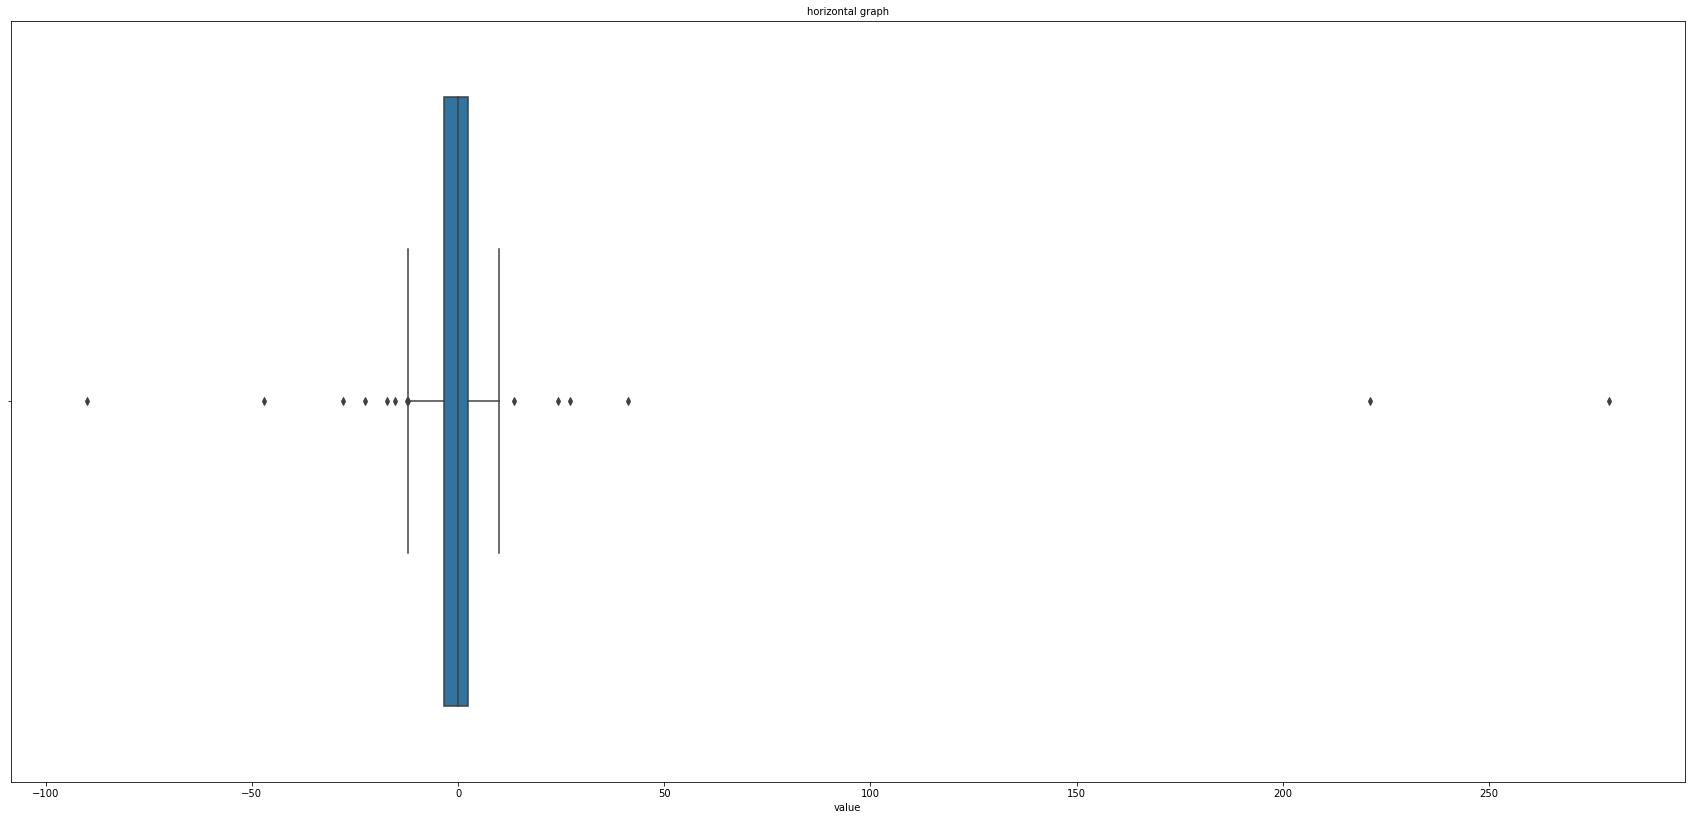

In [63]:
# 가로 그래프
plt.figure(figsize = (30, 14))
sns.boxplot(x = 'value', data = rank)
plt.title('horizontal graph', size = 10)
plt.show()

In [64]:
rank.reset_index()

,index,value
0,동대문구 장안1동,278.997982
1,강서구 화곡4동,221.257028
2,강서구 화곡8동,41.108007
3,송파구 풍납1동,27.041441
4,강서구 화곡2동,24.335181
...,...,...
88,강서구 화곡본동,-17.307976
89,금천구 독산2동,-22.645559
90,금천구 독산4동,-27.986948
91,강남구 역삼2동,-47.080660


In [71]:
round(93*0.23)

21

In [ ]:
n = 93

one = n*0.04
two = n*0.11 

n*0.23

n*0.40

n*0.60

n*0.77

n*0.89

n*0.96



In [149]:
n = 93
rank["rank"] = ""

In [150]:
tu = {9:n*1.00, 8:n*0.96, 7:n*0.89, 6:n*0.77, 5:n*0.60, 4:n*0.40, 3:n*0.23, 2:n*0.11,1:n*0.04}

if i in tu: 
    rank.iloc[:int(np.floor(tu[i]))]["rank"] = 9-i
    print(int(np.floor(tu[i])))
    print(i)

93
9


In [151]:
rank.iloc[:int(np.floor(tu[1]))][["rank"]]=1

In [160]:
rank.iloc[:int(np.floor(tu[8]))][["rank"]]

,rank
동대문구 장안1동,
강서구 화곡4동,
강서구 화곡8동,
송파구 풍납1동,
강서구 화곡2동,
...,...
송파구 풍납2동,
동대문구 전농2동,
강남구 청담동,
강남구 삼성1동,


In [178]:
#rank.to_excel("rank_수요지수.xlsx")

In [180]:
rank = pd.read_excel("rank_수요지수.xlsx") # 파이썬 이용해서 엑셀에서 편집
rank = rank.rename(columns={"Unnamed: 0":"구동"})

In [185]:
rank[rank["rank"]==6]

,구동,value,rank
55,송파구 송파2동,-1.140554,6
56,송파구 가락1동,-1.339987,6
57,송파구 삼전동,-1.477639,6
58,강남구 일원본동,-1.627991,6
59,송파구 잠실2동,-1.671505,6
60,동대문구 휘경1동,-1.825156,6
61,강서구 가양2동,-1.832902,6
62,송파구 방이2동,-2.039956,6
63,강남구 일원2동,-2.141561,6
64,강서구 발산1동,-2.275812,6


In [182]:
df.reset_index()

,gd_nm,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio
0,송파구 가락1동,7,18,1,0,9.253223,0.093635,0.037487
1,송파구 가락2동,5,0,2,1,9.253223,0.067113,0.056981
2,송파구 가락본동,7,1,2,2,9.253223,0.047275,0.096536
3,금천구 가산동,26,4,0,5,9.534345,0.052174,0.308628
4,강서구 가양1동,48,4,2,0,9.902274,0.145209,0.258801
...,...,...,...,...,...,...,...,...
88,강서구 화곡8동,3,1,0,0,9.902274,0.043457,0.105671
89,강서구 화곡본동,5,0,1,0,9.902274,0.035870,0.130900
90,동대문구 회기동,2,0,1,0,8.720180,0.047081,0.261312
91,동대문구 휘경1동,6,2,0,0,8.720180,0.043489,0.177711


In [186]:
result = df.merge(rank, left_on="gd_nm", right_on="구동", how='outer')
result.set_index("구동",inplace=True)

In [188]:
#result.to_excel("fin_dataset_ecorank.xlsx")

In [215]:
ecorank = pd.read_excel("fin_dataset_ecorank.xlsx")

In [214]:
dong = pd.read_excel("fin_dataset_dong_2.xlsx")

In [220]:
dong["one_ratio"] = dong["one_hh"]/dong["sum_pop"]
dong=dong.drop(columns={"sum_pop","sum_hh","one_hh","count_univ","sum_order","x","y","dong_ID"})

In [212]:
one = list(ecorank[ecorank["rank"]==1]["dong_nm"].unique())
one

['장안1동', '화곡4동', '화곡8동']

막상 뽑힌 장안1동은 그렇게 높지 않음 -> 엉터리 계산이지만 cc_value

<br>

화곡 4동 / 8동 -> 굿

In [233]:
dong[dong["dong_nm"]=="화곡3동"]

,gd_nm,goo_nm,dong_nm,dong_area,cc_value,count_zero,count_market,count_bus,count_station,sum_bus,sum_station,sum_waste,one_ratio
85,강서구 화곡3동,강서구,화곡3동,0.53,30,0,2,9,0,1410871,0,4928.8,0.084374


In [226]:
list(ecorank[ecorank["rank"]==2]["dong_nm"].unique())

['거여1동', '마천1동', '마천2동', '시흥3동', '풍납1동', '화곡2동', '화곡3동']

거여1동/화곡2동/화곡3동

10 -> 마천1동/

0 -> 마천2동/시흥3동/풍납1동

1. 유동인구 및 주변 환경 고려해 클러스터링
2. 수요랭킹으로 25위권거르기 (변수 유의함 -> 히트맵.. 그리고 다른 것도 시각화 도구 사용)
3. 최종적으로 상권변화지표를 통해 5개의 행정동 선정

In [216]:
ecorank.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value,rank
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,8.623656,5.064516,1.430108,1.172043,9.263356,0.065602,0.113885,3.725253,5.043011
std,7.265035,5.819395,1.362525,1.632707,0.412634,0.046200,0.064097,39.358250,1.972165
min,0.000000,0.000000,0.000000,0.000000,8.720180,0.029933,0.011957,-90.039283,1.000000
25%,4.000000,1.000000,0.000000,0.000000,8.917437,0.046580,0.070561,-3.376419,4.000000
50%,6.000000,3.000000,1.000000,1.000000,9.253223,0.054709,0.100550,-0.088247,5.000000
75%,10.000000,7.000000,2.000000,2.000000,9.534345,0.069205,0.154840,2.495012,6.000000
max,48.000000,27.000000,5.000000,8.000000,9.902274,0.365737,0.308628,278.997982,9.000000


In [221]:
dong.describe()

,dong_area,cc_value,count_zero,count_market,count_bus,count_station,sum_bus,sum_station,sum_waste,one_ratio
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,93.000000,93.000000
mean,1.522366,18.903226,0.053763,1.580645,24.623656,0.774194,3.562193e+06,2.914767e+06,4510.054839,0.113885
std,1.430566,12.790166,0.226773,1.643978,16.319443,0.968291,2.346465e+06,4.771304e+06,786.800413,0.064097
min,0.450000,0.000000,0.000000,0.000000,3.000000,0.000000,5.130930e+05,0.000000e+00,3237.000000,0.011957
25%,0.800000,8.000000,0.000000,0.000000,14.000000,0.000000,2.023374e+06,0.000000e+00,3794.800000,0.070561
50%,1.130000,29.000000,0.000000,1.000000,22.000000,0.000000,3.007746e+06,0.000000e+00,4271.900000,0.100550
75%,1.650000,30.000000,0.000000,2.000000,29.000000,1.000000,4.514272e+06,4.006044e+06,4928.800000,0.154840
max,10.870000,30.000000,1.000000,7.000000,105.000000,3.000000,1.368976e+07,2.432030e+07,5556.900000,0.308628
